# 2/12/21 - This notebook uses the most recent ideas for creating the noise map... 
Here is the procedure:
1. 1/data in counts to get "shot-noise" of galaxies
2. take 1/sqrt(weight) to get rms noise (background)
3. multiply by gain*exp_time to get counts # This part is the problem because the gain is 0.
4. add background noise to "shot-noise"
5. sqrt(this image)


In [6]:
### libraries
%matplotlib inline
import matplotlib.pyplot as plt
from autoconf import conf
import autolens as al
import autolens.plot as aplt
import autofit as af
import pandas as pd
import numpy as np
from astropy.io import fits
from astropy.visualization import astropy_mpl_style
plt.style.use(astropy_mpl_style)
from astropy.stats import sigma_clip as clip
from astropy.coordinates import SkyCoord
import astropy.units as u
from astropy.nddata import Cutout2D
from astropy.wcs import WCS
import fitsio
from fitsio import FITS,FITSHDR

from pyprojroot import here

workspace_path = '/data/sknabel/'
%cd $workspace_path
print(f"Working Directory has been set to `{workspace_path}`")
# paths
autoz_path = f'{workspace_path}autoz_lens_model/'
file_path = f'{autoz_path}files/'
csv_path = f'{file_path}csv/'
fits_path = f'{file_path}fits/'
png_path = f'{autoz_path}visuals/png/'
pdf_path = f'{autoz_path}visuals/pdf/'
object_folder = f'{fits_path}G3575500_1906/'

/data/sknabel
Working Directory has been set to `/data/sknabel/`


In [15]:
hdul = fitsio.FITS(f'{object_folder}1906_r_weight.fits')
print(hdul)
print(hdul[0].get_info())
print(hdul[0])
print(hdul[0].read_header())
image = hdul[0].read()
#plt.imshow(image)
hdul.close()


  file: /data/sknabel/autoz_lens_model/files/fits/G3575500_1906/1906_r_weight.fits
  mode: READONLY
  extnum hdutype         hduname[v]
  0      IMAGE_HDU       
{'hdunum': 1, 'extnum': 0, 'hdutype': 0, 'extname': '', 'hduname': '', 'extver': 0, 'hduver': 0, 'is_compressed_image': 0, 'header_start': 0, 'data_start': 8640, 'data_end': 1496764800, 'ndims': 2, 'img_type': -32, 'img_equiv_type': -32, 'comptype': None, 'dims': [20024, 18687]}

  file: /data/sknabel/autoz_lens_model/files/fits/G3575500_1906/1906_r_weight.fits
  extension: 0
  type: IMAGE_HDU
  image info:
    data type: f4
    dims: [20024,18687]

SIMPLE  =                    T / conforms to FITS standard
BITPIX  =                  -32 / array data type
NAXIS   =                    2 / number of array dimensions
NAXIS1  =                18687 / Number of pixels along this axis
NAXIS2  =                20024 / Number of pixels along this axis
EXTEND  =                    T / This file may contain FITS extensions
OBJECT  = 'K

OSError: FITSIO status = 108: error reading from FITS file
Error reading data buffer from file:
/data/sknabel/autoz_lens_model/files/fits/G3575500_1906/1906_r_weight.fits
Error reading elements 1 thru 374188488 from image (ffgcle).


In [5]:
help(fitsio)

Help on package fitsio:

NAME
    fitsio

DESCRIPTION
    A python library to read and write data to FITS files using cfitsio.
    See the docs at https://github.com/esheldon/fitsio for example
    usage.

PACKAGE CONTENTS
    _fitsio_wrap
    fitslib
    hdu (package)
    header
    test
    util

DATA
    ASCII_TBL = 1
    BINARY_TBL = 2
    GZIP_1 = 21
    GZIP_2 = 22
    HCOMPRESS_1 = 41
    IMAGE_HDU = 0
    NOCOMPRESS = 0
    NO_DITHER = -1
    PLIO_1 = 31
    READONLY = 0
    READWRITE = 1
    RICE_1 = 11
    SUBTRACTIVE_DITHER_1 = 1
    SUBTRACTIVE_DITHER_2 = 2

VERSION
    1.1.3

FILE
    /soft/anaconda3/lib/python3.7/site-packages/fitsio/__init__.py




252501.95


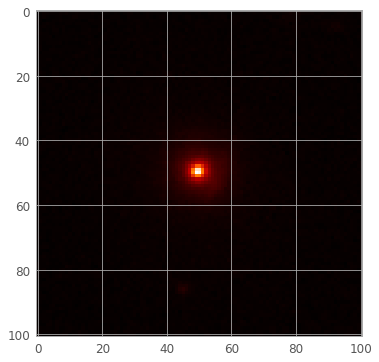

In [12]:
# pull in the r image (already in counts)
hdul = fits.open(f'{object_folder}1906_r_image_counts.fits')
r_image = hdul[0].data
hdul.close()
print(np.mean(r_image))

plt.imshow(r_image)

/soft/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in sqrt
  


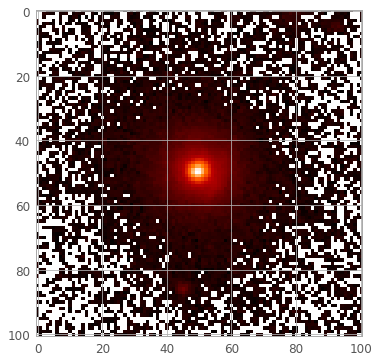

In [13]:
# take sqrt(data) to get the shot-noise
galaxy_noise=np.sqrt(r_image)
plt.imshow(galaxy_noise)